In [224]:
from sklearn import datasets
from sklearn.decomposition import PCA
from scipy.spatial import distance
import matplotlib.pyplot as plt
import numpy as np

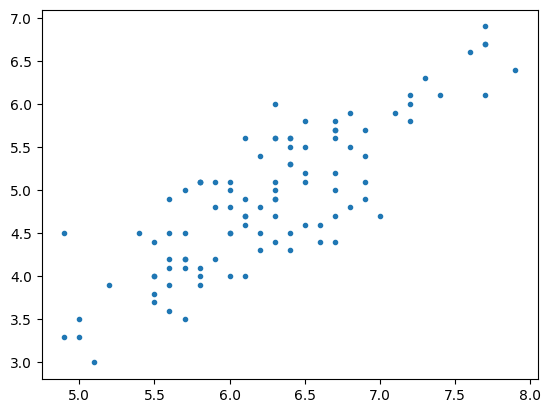

In [343]:
ds = datasets.load_iris()
dat = ds.data
dat = np.vstack((dat[:,0],dat[:,2])).T
x = dat[dat[:,1]>2.5]
plt.plot(x[:,0],x[:,1], '.')

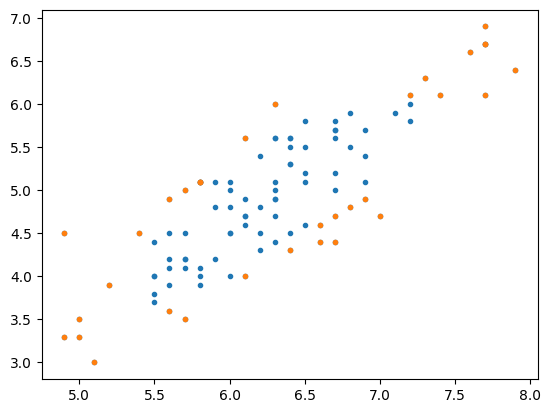

In [404]:
# Mahalanabois Distance of dist
m = x
C = np.cov(m.T, bias=True)
CI = np.linalg.inv(C)
mah = np.sqrt(np.diag(np.matmul(np.matmul(m-np.mean(m, axis=0),CI),(m-np.mean(m, axis=0)).T)))
thr = 1.5
plt.plot(x[:,0],x[:,1], '.')
plt.plot(x[mah>thr,0],x[mah>thr,1], '.')

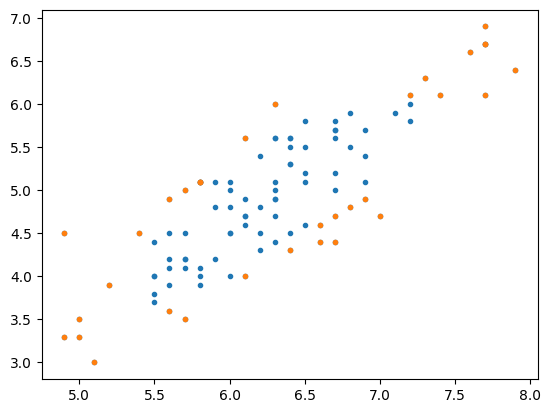

In [416]:
# Mahalanabois Distance of PCA transformed dist
pca = PCA(n_components=2)
x2 = pca.fit(x).transform(x)

m2 = x2
C2 = np.cov(m2.T, bias=True)
CI2 = np.linalg.inv(C2)
mah2 = np.sqrt(np.diag(np.matmul(np.matmul(m2-np.mean(m2, axis=0),CI2),(m2-np.mean(m2, axis=0)).T)))
thr = 1.5
plt.plot(x[:,0],x[:,1], '.')
plt.plot(x[mah2>thr,0],x[mah2>thr,1], '.')

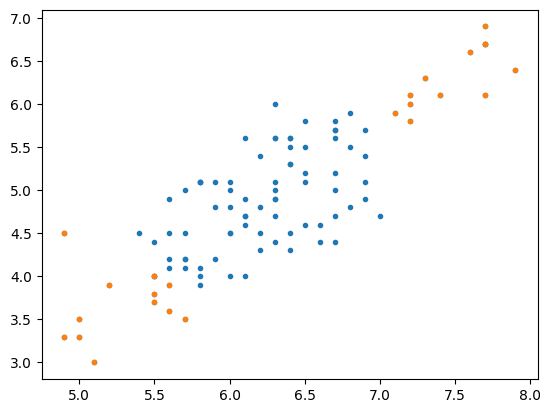

In [413]:
# Euclidean Distance of dist
e = (x-np.mean(x, axis=0))/np.std(x,axis=0)
euc = np.sqrt(np.sum(np.square(e-np.mean(e, axis=0)), axis=1))
thr = 1.5
plt.plot(x[:,0],x[:,1], '.')
plt.plot(x[euc>thr,0],x[euc>thr,1], '.')

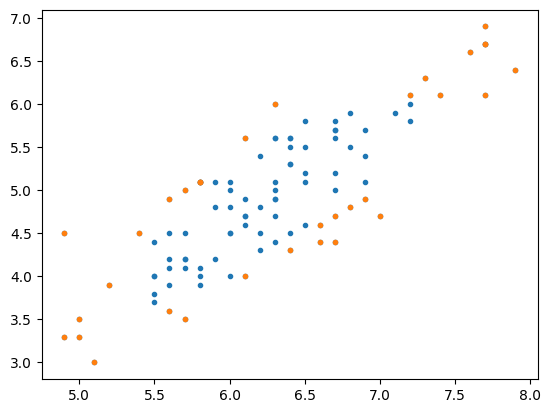

In [412]:
# Euclidean Distance of PCA transformed & normalized dist
e2 = (x2-np.mean(x2, axis=0))/np.std(x2,axis=0)
euc2 = np.sqrt(np.sum(np.square(e2-np.mean(e2, axis=0)), axis=1))
thr = 1.5
plt.plot(x[:,0],x[:,1], '.')
plt.plot(x[euc2>thr,0],x[euc2>thr,1], '.')

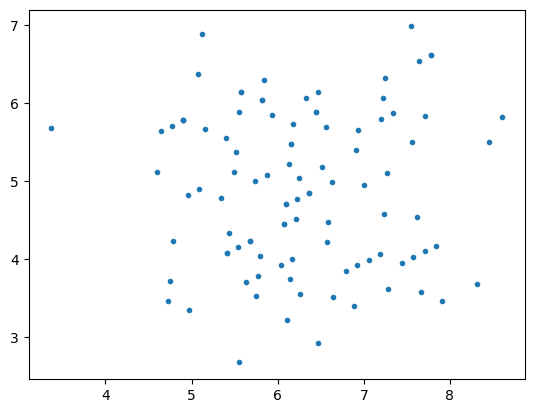

In [388]:
# Inverse transform of PCA transformed & normalized dist
t = pca.fit(x).inverse_transform(e2)
plt.plot(t[:,0],t[:,1], '.')